In [73]:
import pandas as pd


In [74]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import time
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
#import tensorflow_datasets as tfds


In [75]:
from iexfinance.stocks import Stock

In [76]:
#aapl = Stock("AAPL",token =token)

In [77]:
token = 'Tpk_5e6dda7bfc4847b5806b1c7155acfcd6'

In [78]:
import requests
# Requests

In [79]:
import pandas as pd
import requests
from termcolor import colored as cl
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,7)

In [173]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

def plot_confusion_matrix_labeled(y_true, y_pred, CLASSES_LIST):
    mtx = confusion_matrix(y_true, y_pred)
    # define classes 
    classes = CLASSES_LIST
    temp_df = pd.DataFrame(data=mtx,columns=classes)
    temp_df.index = classes
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(temp_df, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [80]:
def get_latest_updates(*ticker):
    for i in ticker:
        if i:
            ticker = i
            iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'
            api_url = f'https://cloud.iexapis.com/stable/stock/{ticker}/quote?token={iex_api_key}'
            df = requests.get(api_url).json()
            print(cl('Latest Updates of {}\n--------------'.format(ticker), attrs = ['bold']))
            attributes = ['symbol', 
                          'latestPrice', 
                          'marketCap', 
                          'peRatio']
            for i in attributes:
                print(cl('{} :'.format(i), attrs = ['bold']), '{}'.format(df[i]))    
            print(cl('--------------\n', attrs = ['bold']))

#get_latest_updates('FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL')

In [81]:
def get_historic_data(ticker):
    ticker = ticker
    iex_api_key = 'Tsk_30a2677082d54c7b8697675d84baf94b'
    api_url = f'https://sandbox.iexapis.com/stable/stock/{ticker}/chart/max?token={iex_api_key}'
    df = requests.get(api_url).json()
    
    date = []
    open = []
    high = []
    low = []
    close = []
    
    for i in range(len(df)):
        date.append(df[i]['date'])
        open.append(df[i]['open'])
        high.append(df[i]['high'])
        low.append(df[i]['low'])
        close.append(df[i]['close'])
    
    date_df = pd.DataFrame(date).rename(columns = {0:'date'})
    open_df = pd.DataFrame(open).rename(columns = {0:'open'})
    high_df = pd.DataFrame(high).rename(columns = {0:'high'})
    low_df = pd.DataFrame(low).rename(columns = {0:'low'})
    close_df = pd.DataFrame(close).rename(columns = {0:'close'})
    
    frames = [date_df, open_df, high_df, low_df, close_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    df = df.set_index('date')
    
    df['open'].plot()
    plt.title('{} Historical Prices'.format(ticker), fontsize = 10)
    plt.xlabel('Date', fontsize = 10)
    plt.ylabel('Stock Price', fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.show()
    
    return df

#get_historic_data('AAPL')

In [82]:
def get_intraday_prices(ticker):
    ticker = ticker
    iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'
    url = f'https://cloud.iexapis.com/stable/stock/{ticker}/intraday-prices?token={iex_api_key}'
    df = requests.get(url).json()
    date = df[1]['date']
        
    time = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    number_of_trades = []
    
    for i in range(len(df)):
        time.append(df[i]['label'])
        open.append(df[i]['open'])
        high.append(df[i]['high'])
        low.append(df[i]['low'])
        close.append(df[i]['close'])
        volume.append(df[i]['volume'])
        number_of_trades.append(df[i]['numberOfTrades'])
        
    time_df = pd.DataFrame(time).rename(columns = {0:'Time'})
    open_df = pd.DataFrame(open).rename(columns = {0:'Open'})
    high_df = pd.DataFrame(high).rename(columns = {0:'High'})
    low_df = pd.DataFrame(low).rename(columns = {0:'Low'})
    close_df = pd.DataFrame(close).rename(columns = {0:'Close'})
    volume_df = pd.DataFrame(volume).rename(columns = {0:'Volume'})
    number_of_trades_df = pd.DataFrame(number_of_trades).rename(columns = {0:'Number of Trades'})
     
    frames = [time_df, open_df, high_df, low_df, close_df, volume_df, number_of_trades_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    df = df.set_index('Time')

    df['Open'].plot()
    plt.title(f'{ticker} Intraday Prices on {date}', fontsize = 18)
    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('Stock Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    return df

#get_intraday_prices('TSLA')

In [83]:
def financial(ticker):
    iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'
    url = f'https://cloud.iexapis.com/stable/time-series/REPORTED_FINANCIALS/{ticker}/{input("10-k or 10-q")}?token={iex_api_key}'
    df = requests.get(url)
    return df.json()

In [84]:
def div(ticker):
    iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'

    url = f'https://cloud.iexapis.com/stable/stock/{ticker}/dividends?token={iex_api_key}'
    df = requests.get(url)
    return df.json()

In [85]:
def get_info(ticker):
    pass

In [86]:
tags= ["what is the ","what is ", "can you please get ", "get the ", "get ", "can you help me find ", "find the ", "find the of ","please find ","find the of ",
       "help me with ","help me ", ""]

In [87]:
for i in tags:
    print(i,",")

what is the  ,
what is  ,
can you please get  ,
get the  ,
get  ,
can you help me find  ,
find the  ,
find the of  ,
please find  ,
find the of  ,
help me with  ,
help me  ,
 ,


In [88]:
%cd C:\Users\hag8665\Desktop\MSDS 453\Final project

C:\Users\hag8665\Desktop\MSDS 453\Final project


In [89]:
# create intent data

In [90]:
intentdf= pd.read_excel('intentdata.xlsx')

In [91]:
intentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18 non-null     object
 1   intent  18 non-null     object
dtypes: object(2)
memory usage: 416.0+ bytes


In [92]:
#explode the text to expand the data

In [93]:
intentdf =intentdf.assign(text=intentdf.text.str.split(","))

In [94]:
intentdf = intentdf.explode('text')

In [95]:
intentdf.head()

,text,intent
0,dividend,dividends
0,dividends,dividends
0,distributions,dividends
0,distribution,dividends
0,dividend yield,dividends


In [96]:
intentdf['fulltext'] = intentdf['text'].apply(lambda x:[ i+ x for i  in tags ])

In [97]:
intentdf = intentdf.explode(['fulltext'])

In [98]:
tickerdf= pd.read_excel('tickerlist.xlsx')

In [99]:
tickerlist= tickerdf['companies'].to_list()

In [100]:
intentdf['intent'] = intentdf['intent'].astype("category")

In [101]:
intentdf['intent code'] = intentdf['intent'].cat.codes

In [102]:
findlabel = intentdf[['intent','intent code']].drop_duplicates()

In [103]:
findlabel

,intent,intent code
0,dividends,6
1,financials,7
2,sustainability score,17
3,news,12
4,annual financials,1
5,quaterly financials,14
6,current price,4
7,historical price,9
8,income statement,10
9,balance sheet,2


In [104]:
#intentdf.to_excel('test.xlsx')

In [105]:
# create data for embedding

In [106]:
# intentdf['intent'] = intentdf['intent'].astype("category")

In [107]:
# intentdf['intent code'] = intentdf['intent'].cat.codes

In [108]:

def get_dataset_partitions_pd(df, train_split=0.8, val_split=0.10, test_split=0.10):
    #assert (train_split + test_split + val_split) == 1
    
    # Only allows for equal validation and test splits
    #assert val_split == test_split 

    # Specify seed to always have the same split distribution between runs
    df_sample = df.sample(frac=1, random_state=12)
    indices_or_sections = [int(.8*len(df)), int(.9*len(df))]
    
    train_ds, val_ds, test_ds = np.split(df_sample, indices_or_sections)
    
    return train_ds, val_ds, test_ds

In [109]:
trainds, valds, testds = get_dataset_partitions_pd(intentdf[['fulltext','intent code']])

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
 features, targets = intentdf['fulltext'], intentdf['intent code']
 
 train_features, test_features, train_targets, test_targets = train_test_split( features, targets , test_size=0.20, random_state=42, shuffle = True,
        stratify=targets)


In [112]:
x_train = train_features.to_numpy()

y_train = train_targets.to_numpy()

x_test = test_features.to_numpy()

y_test = test_targets.to_numpy()

In [113]:
counts = intentdf["fulltext"].str.findall(r"(\w+)").explode().value_counts()

In [114]:
print ("Total number of words= {} : Total number of unque words= {}". format(counts.values.sum(), counts.shape[0]))

Total number of words= 5050 : Total number of unque words= 115


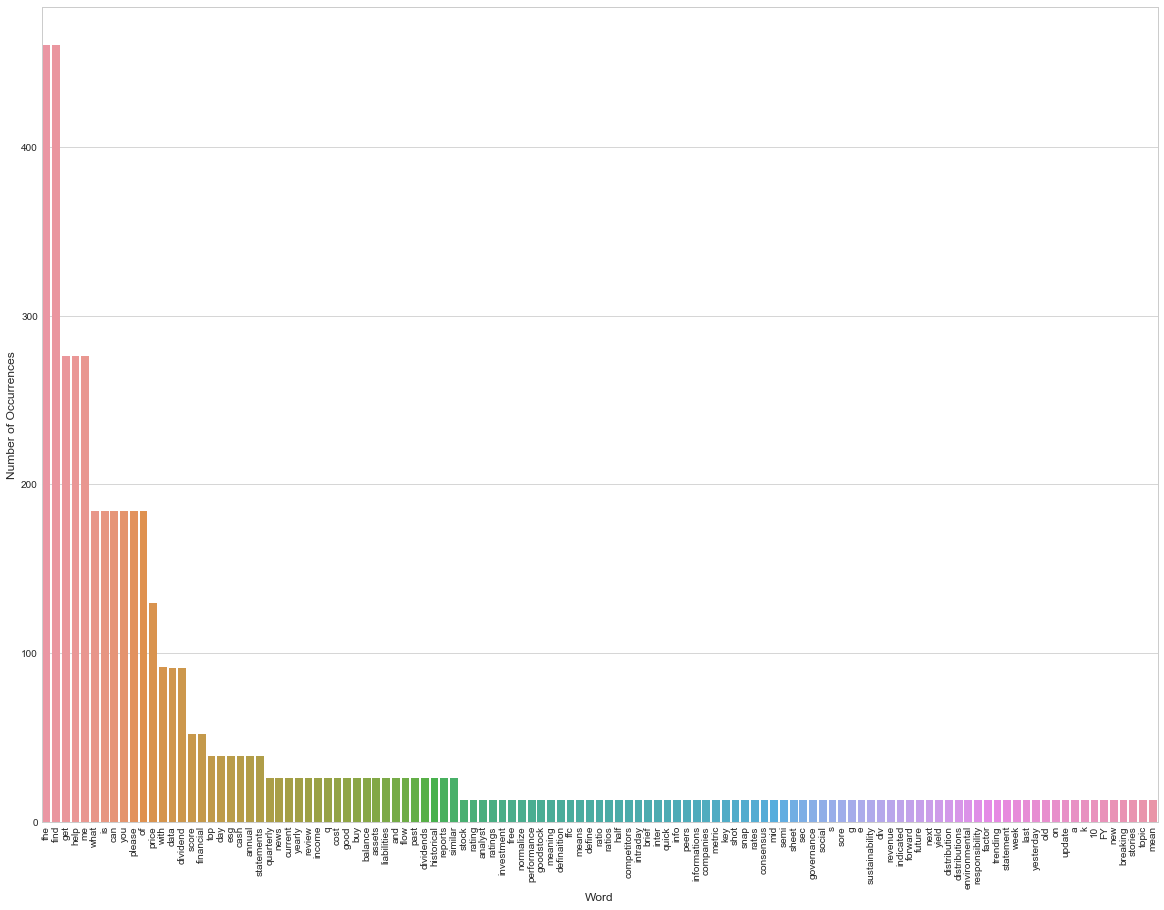

In [115]:
fig, ax = plt.subplots(figsize=(20,15))
sns.barplot(x=counts.index, y=counts.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.xaxis.set_tick_params(rotation=90)

In [116]:

encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
     standardize="lower_and_strip_punctuation")
encoder.adapt(intentdf['fulltext'].to_numpy(), batch_size= None)

In [117]:
counts = intentdf["fulltext"].str.findall(r"(\w+)").explode().value_counts()

In [118]:
len(encoder.get_vocabulary())

116

In [119]:
encoded_example = encoder('get the divdend for ticker').numpy()
encoded_example[:]

array([6, 2, 1, 1, 1], dtype=int64)

In [120]:
intentdf['intent code'].nunique()

18

In [121]:
num_classes = intentdf['intent code'].nunique()
model = tf.keras.Sequential([
                              encoder
                              ,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary())
                              ,output_dim=32
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dense(num_classes, activation='softmax')   # num_classes = 5
])

In [122]:
model.compile(optimizer= 'adam'
              ,loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 32)          3712      
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 18)                1170      
                                                                 
Total params: 62,802
Trainable params: 62,802
Non-traina

In [124]:
%%time
history = model.fit(x_train, y_train
                    ,epochs = 200
                    #,validation_data = val_ds
                    ,validation_split= 0.2
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)]
                    )

Epoch 1/200
24/24 [==============================] - 7s 79ms/step - loss: 2.8782 - accuracy: 0.1374 - val_loss: 2.8594 - val_accuracy: 0.1354
Epoch 2/200
24/24 [==============================] - 0s 6ms/step - loss: 2.8016 - accuracy: 0.1348 - val_loss: 2.7381 - val_accuracy: 0.1406
Epoch 3/200
24/24 [==============================] - 0s 5ms/step - loss: 2.5577 - accuracy: 0.1846 - val_loss: 2.3990 - val_accuracy: 0.2969
Epoch 4/200
24/24 [==============================] - 0s 5ms/step - loss: 2.0443 - accuracy: 0.3743 - val_loss: 1.7815 - val_accuracy: 0.5104
Epoch 5/200
24/24 [==============================] - 0s 5ms/step - loss: 1.3090 - accuracy: 0.6819 - val_loss: 0.9398 - val_accuracy: 0.8385
Epoch 6/200
24/24 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.8927 - val_loss: 0.4925 - val_accuracy: 0.9583
Epoch 7/200
24/24 [==============================] - 0s 6ms/step - loss: 0.3537 - accuracy: 0.9647 - val_loss: 0.3203 - val_accuracy: 0.9844
Epoch 8/200


In [125]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 2s 3ms/step - loss: 0.0616 - accuracy: 1.0000


[0.06164790689945221, 1.0]

In [ ]:
#sample predctions

In [126]:
p= ["get yesterday dividend and price"]

In [127]:
p

['get yesterday dividend and price']

In [128]:
np.argmax(model.predict(p))

9

In [ ]:
#test data evalutaion

In [181]:
CLASSES_LIST = findlabel.sort_values("intent code")['intent'].tolist()

In [182]:
preds = model.predict(x_test)



In [183]:
y_pred = np.argmax(preds, axis=1)

In [184]:
y = y_test


confusion_matrix(y, y_pred)



array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  

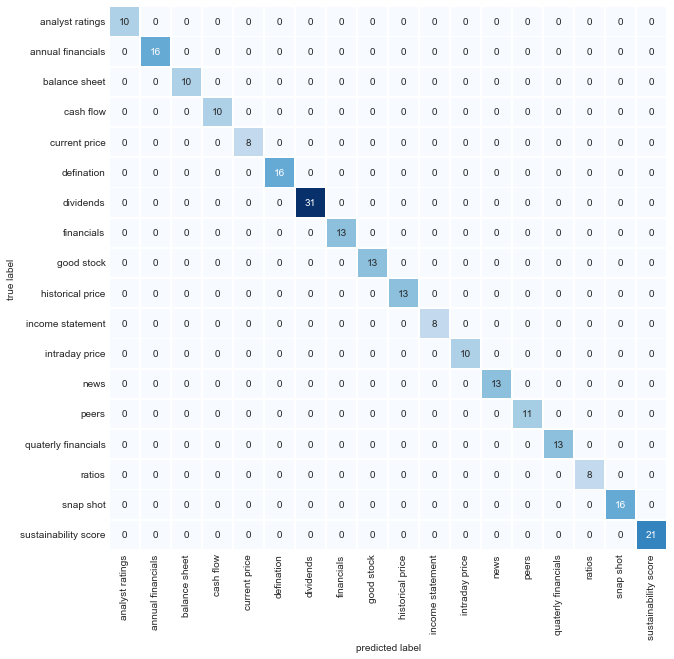

In [185]:
plot_confusion_matrix_labeled(y,y_pred, CLASSES_LIST=CLASSES_LIST)

In [186]:
print_validation_report(y,y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        13
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00        16
     

In [129]:
#get mapper of intent using finallabel dataframe
mapper = findlabel.set_index("intent code").to_dict()

In [130]:
tickerdf= pd.read_excel('tickerlist.xlsx')

In [131]:
from spacy.tokens.doc import Doc
from spacy.vocab import Vocab

import spacy

nlp = spacy.load('en_core_web_lg')

In [132]:
from spacy import displacy

In [209]:
doc = nlp("get price for L")

In [210]:
displacy.render(doc, style= 'ent')

In [134]:
tickerdf['companies'] = tickerdf['companies'].str.lower()

In [135]:
tickerdf['companies_l'] = tickerdf['companies'].str.split()

In [136]:
# tickerdf[pd.DataFrame(tickerdf['companies_l'].tolist()).isin(ent).any(1).values]["companies"].str.split().tolist()[0][-1]

In [137]:

functionmap = {'dividends':div, 
 'financials': financial, 
 'sustainability score': 'ESG score ...', 
 'news' : 'News:......',
 'annual financials': 'Annual statements...', 
 'quaterly financials': 'Quartely statements...', 
 'current price': get_latest_updates , 
 'historical price': get_historic_data , 
  'income statement': 'Income statements... ', 
 'balance sheet' : 'Balance sheet.....', 
 'cash flow' : "cashflow.....", 
 'good stock' : "top stocks...", 
 'analyst ratings': "analyst ratings..", 
 'snap shot': get_latest_updates, 
 'intraday price': get_intraday_prices, 
 'peers': "Peers...", 
 'ratios': "Ratios...", 
 'defination': get_info}

In [138]:
import random

In [139]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [140]:
new_greeting = (["how can i help you next", "anthing else i can help you with", "is there anything i can help you with"])

def greetingnew():
    return random.choice(new_greeting)

In [141]:
mapper['intent'][9]

'historical price'

In [142]:
def response(user_response):
    prob = model.predict([user_response])
    idx = np.argmax(prob)
    #idx = np.sort(idx)[::-1]
    
    
    doc = nlp(user_response)
    #print(doc.ents)
    try:
        intent = mapper['intent'][idx]
        print (intent)
        if intent == 'defination':
            #print (intent)
            info =  functionmap[intent](user_response)
            return info
        if len(doc.ents) == 0:
            return "cannot find what you are looking for please try again"
        
        for i in doc.ents:
            #print(i)
            i = str(i)



            try:

                ticker = tickerdf.loc[tickerdf['companies'].str.contains(i, regex= False)]['companies'].str.split(" ").tolist()[0][-1]

                #print(ticker)

                #print(intent)

                if type(functionmap[intent])!= str:
                    #print(type(functionmap[intent]))
                    valf = (functionmap[intent](ticker))
                    if valf:
                        return valf
                else:
                    valp = functionmap[intent]
                    if valp:
                        return valp
            except:
                return "cannot find what you are looking for please try again"
    except:
        pass

   
    #return greetingnew()
    
         

In [143]:
 def chatbot():   
    flag=True
    print("Finbot:Hi I am Finbot and how can i help you. Type bye to exit")
    while(flag==True):
        user_response = input()
        user_response=user_response.lower()
        if(user_response!='bye'):
            if(user_response=='thanks' or user_response=='thank you' ):
                flag=False
                print("Finbot: You are welcome..")
            else:
                if(greeting(user_response)!=None):
                    print("Finbot: "+greeting(user_response))
                else:
                    print("Finbot: ",end="")
                    print(response(user_response))
                    print(greetingnew())
                    #clean_tokens.remove(user_response)
        else:
            flag=False
            print("Finbot: Bye! take care..")

In [144]:
chatbot()

Finbot:Hi I am Finbot and how can i help you. Type bye to exit
bye
Finbot: Bye! take care..


In [145]:
from iexfinance.stocks import Stock

In [146]:
#aapl = Stock("AAPL",token =token)

In [147]:
token = 'Tpk_5e6dda7bfc4847b5806b1c7155acfcd6'

In [148]:
import requests
# Requests

In [149]:
import pandas as pd
import requests
from termcolor import colored as cl
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,7)

In [150]:
def get_latest_updates(*ticker):
    for i in ticker:
        if i:
            ticker = i
            iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'
            api_url = f'https://cloud.iexapis.com/stable/stock/{ticker}/quote?token={iex_api_key}'
            df = requests.get(api_url).json()
            print(cl('Latest Updates of {}\n--------------'.format(ticker), attrs = ['bold']))
            attributes = ['symbol', 
                          'latestPrice', 
                          'marketCap', 
                          'peRatio']
            for i in attributes:
                print(cl('{} :'.format(i), attrs = ['bold']), '{}'.format(df[i]))    
            print(cl('--------------\n', attrs = ['bold']))

#get_latest_updates('FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL')

In [151]:
def get_historic_data(ticker):
    ticker = ticker
    iex_api_key = 'Tsk_30a2677082d54c7b8697675d84baf94b'
    api_url = f'https://sandbox.iexapis.com/stable/stock/{ticker}/chart/max?token={iex_api_key}'
    df = requests.get(api_url).json()
    
    date = []
    open = []
    high = []
    low = []
    close = []
    
    for i in range(len(df)):
        date.append(df[i]['date'])
        open.append(df[i]['open'])
        high.append(df[i]['high'])
        low.append(df[i]['low'])
        close.append(df[i]['close'])
    
    date_df = pd.DataFrame(date).rename(columns = {0:'date'})
    open_df = pd.DataFrame(open).rename(columns = {0:'open'})
    high_df = pd.DataFrame(high).rename(columns = {0:'high'})
    low_df = pd.DataFrame(low).rename(columns = {0:'low'})
    close_df = pd.DataFrame(close).rename(columns = {0:'close'})
    
    frames = [date_df, open_df, high_df, low_df, close_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    df = df.set_index('date')
    
    df['open'].plot()
    plt.title('{} Historical Prices'.format(ticker), fontsize = 10)
    plt.xlabel('Date', fontsize = 10)
    plt.ylabel('Stock Price', fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.show()
    
    return df

#get_historic_data('AAPL')

In [152]:
def get_intraday_prices(ticker):
    ticker = ticker
    iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'
    url = f'https://cloud.iexapis.com/stable/stock/{ticker}/intraday-prices?token={iex_api_key}'
    df = requests.get(url).json()
    date = df[1]['date']
        
    time = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    number_of_trades = []
    
    for i in range(len(df)):
        time.append(df[i]['label'])
        open.append(df[i]['open'])
        high.append(df[i]['high'])
        low.append(df[i]['low'])
        close.append(df[i]['close'])
        volume.append(df[i]['volume'])
        number_of_trades.append(df[i]['numberOfTrades'])
        
    time_df = pd.DataFrame(time).rename(columns = {0:'Time'})
    open_df = pd.DataFrame(open).rename(columns = {0:'Open'})
    high_df = pd.DataFrame(high).rename(columns = {0:'High'})
    low_df = pd.DataFrame(low).rename(columns = {0:'Low'})
    close_df = pd.DataFrame(close).rename(columns = {0:'Close'})
    volume_df = pd.DataFrame(volume).rename(columns = {0:'Volume'})
    number_of_trades_df = pd.DataFrame(number_of_trades).rename(columns = {0:'Number of Trades'})
     
    frames = [time_df, open_df, high_df, low_df, close_df, volume_df, number_of_trades_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    df = df.set_index('Time')

    df['Open'].plot()
    plt.title(f'{ticker} Intraday Prices on {date}', fontsize = 18)
    plt.xlabel('Time', fontsize = 14)
    plt.ylabel('Stock Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    return df

#get_intraday_prices('TSLA')

In [153]:
def financial(ticker):
    iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'
    url = f'https://cloud.iexapis.com/stable/time-series/REPORTED_FINANCIALS/{ticker}/{input("10-k or 10-q")}?token={iex_api_key}'
    df = requests.get(url)
    return df.json()[0]

In [154]:
def div(ticker):
    iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'

    url = f'https://cloud.iexapis.com/stable/stock/{ticker}/dividends?token={iex_api_key}'
    df = requests.get(url)
    return df.json()[0]

In [155]:
import json

In [156]:
iex_api_key = 'pk_32ef64b2003542b6a829b8f94831c789'
url = f'https://cloud.iexapis.com/stable/stock/AAPL/dividends?token={iex_api_key}'
df = requests.get(url)


In [157]:
df.json()[0]


{'amount': 0.22,
 'currency': 'USD',
 'declaredDate': '2022-01-27',
 'description': 'Ordinary Shares',
 'exDate': '2022-02-04',
 'flag': 'Cash',
 'frequency': 'quarterly',
 'paymentDate': '2022-02-10',
 'recordDate': '2022-02-07',
 'refid': 2430900,
 'symbol': 'AAPL',
 'id': 'DIVIDENDS',
 'key': 'AAPL',
 'subkey': '2430900',
 'date': 1643932800000,
 'updated': 1647175381810.59}

In [158]:
import nltk
import numpy as np
import random
import string # to process standard python strings

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

In [159]:
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [160]:
f=open(r'C:\Users\hag8665\Desktop\MSDS 453\Final project\corpus.txt','r',errors = 'ignore')
raw=f.read()
raw=raw.lower()# converts to lowercase


In [161]:
from nltk.tokenize import BlanklineTokenizer

In [162]:
sent_tokens= BlanklineTokenizer().tokenize(raw)

In [163]:
import re

In [164]:
def clean_text(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [165]:
clean_token=[]
for i in sent_tokens:
  clean_token.append(clean_text(i))

In [166]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

In [167]:
def LemNormalize(text):
    return nltk.word_tokenize(text.lower().translate(remove_punct_dict))

In [168]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [169]:
def get_info(user_response):
    robo_response=''
    clean_token.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(clean_token)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+clean_token[idx]
        # answer = nlp({
        #               'question': f'{user_response}',
        #               'context': robo_response
        #           })
        clean_token.remove(user_response)
        return  robo_response  #answer['answer'] 

In [170]:
# flag=True
# print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
# while(flag==True):
#     user_response = input()
#     user_response=user_response.lower()
#     if(user_response!='bye'):
#         if(user_response=='thanks' or user_response=='thank you' ):
#             flag=False
#             print("ROBO: You are welcome..")
#         else:
#             if(greeting(user_response)!=None):
#                 print("ROBO: "+greeting(user_response))
#             else:
          
#                 print("ROBO: ",end="")
#                 print(response(user_response))
#                 clean_token.remove(user_response)
#     else:
#         flag=False
#         print("ROBO: Bye! take care..")

In [171]:
len(clean_token)

165

In [172]:
clean_token

['active management the trading of securities to take advantage of market opportunities as they occur in contrast to passive management active managers rely on research market forecasts and their own judgment and experience in selecting securities to buy and sell',
 'aggressive an investment approach that accepts above average risk of loss in return for potentially above average investment returns',
 'aggressive growth fund an investment fund that takes higher risk of loss in return for potentially higher returns or gains',
 'amex major market index xmi an index that is an average of 20 blue chip industrial stocks',
 'annual report a yearly report or record of an investment s e g a mutual fund s or company s financial position and operations',
 'annual rate of return the annual rate of gain or loss on an investment expressed as a percentage',
 'appreciation an increase in the value of an investment',
 'asset anything with commercial or exchange value owned by a business institution or 

In [191]:
from tensorflow.keras import models, layers
from sklearn.manifold import TSNE